# Using object-oriented interface (*QGField*)

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from hn2016_falwa.oopinterface import *

## Example of using the object *QGField* (3D flow)

In [2]:
# === Load data and coordinates ===

u_QGPV_File = Dataset('u_QGPV_240hPa_2012Oct28to31.nc', mode='r')
# --- Read in longitude and latitude arrays --- #
xlon = u_QGPV_File.variables['longitude'][:]
ylat = u_QGPV_File.variables['latitude'][:]
clat = np.abs(np.cos(ylat*pi/180.)) # cosine latitude
nlon = xlon.size
nlat = ylat.size

# === Read in zonal wind profile ===
u = u_QGPV_File.variables['U'][0, ...]

# === Read in QGPV profile ===
QGPV = u_QGPV_File.variables['QGPV'][0, ...]
u_QGPV_File.close()


### Create a *QGField* object

In [3]:
cc2 = QGField(xlon, ylat, np.array([240.]), u, qgpv_field=QGPV)  # area computed in the class assumed uniform grid

check self.qgpv_field


### Compute equivalent latitude and local wave activity

In [4]:
# Compute Equivalent Latitudes
cc2_eqvlat = cc2.equivalent_latitudes()

# Compute Local Wave Activity
cc2_lwa = cc2.lwa()

### Plot the results

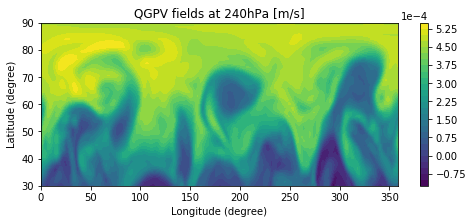

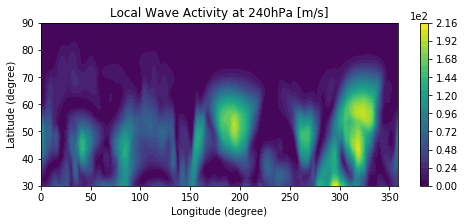

In [5]:
plt.figure(figsize=(8, 3))
c = plt.contourf(xlon, ylat[80:], cc2.qgpv_field[0, 80:, :], 31)
cb = plt.colorbar(c)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')
cb.update_ticks()
plt.title('QGPV fields at 240hPa [m/s]')
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.show()

plt.figure(figsize=(8, 3))
c = plt.contourf(xlon, ylat[80:], cc2_lwa[0, 80:, :], 31)
cb = plt.colorbar(c)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')
cb.update_ticks()
plt.title('Local Wave Activity at 240hPa [m/s]')
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.show()